In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations

import logging

import numpy as np

from mhsxtrapy.b3d import WhichSolution
from mhsxtrapy.field2d import (
    Field2dData,
    FluxBalanceState,
    alpha_HS04,
    check_fluxbalance,
)
from mhsxtrapy.field3d import calculate_magfield
from mhsxtrapy.plotting.vis import (
    plot_ddensity_xy,
    plot_ddensity_z,
    plot_dpressure_xy,
    plot_dpressure_z,
    plot_magnetogram_2D,
    plot_magnetogram_3D,
)
from mhsxtrapy.prep import find_corners_SDO

The following packages are not installed:
['mpl-animators>=1.0.0', 'reproject>=0.9.0']
To install sunpy with these dependencies use `pip install sunpy[map]` or `pip install sunpy[all]` for all extras. 
If you installed sunpy via conda, please report this to the community channel: https://matrix.to/#/#sunpy:openastronomy.org [sunpy.util.sysinfo]
The following packages are not installed:
['mpl-animators>=1.0.0']
To install sunpy with these dependencies use `pip install sunpy[visualization]` or `pip install sunpy[all]` for all extras. 
If you installed sunpy via conda, please report this to the community channel: https://matrix.to/#/#sunpy:openastronomy.org [sunpy.util.sysinfo]
/Users/lilli/Library/Caches/pypoetry/virtualenvs/mhsxtrapy-_witMKZG-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Example for magnetic field extrapolation from SDO/HMI data

##### Read SDO/HMI file

SDO HMI magnetogram from 13 June 2012 7:31 UT saved in folder EXAMPLE-SDO/data.
Originally downloaded from JSOC using SunPy, for details see https://docs.sunpy.org/en/stable/tutorial/acquiring_data/jsoc.html.

Disclaimer: Current problems at JSOC might make downloads using SunPy impossible. Therefore, the data file is provided directly. 

In [3]:
path = "data/hmi_m_45s_2012_06_13_07_31_30_tai_magnetogram.fits"

##### Determine 2D boundary condition 

SDO/HMI observes full disk magnetograms, such that the obtained line-of-sight magnetic field component needs to be cut to an area around the (active)
region, that one aims to investigate. This cutout needs to be close to the disk centre and small enough that neglecting the curvature of the solar surface 
is appropriate and the utilisation of Cartesian coordinates justified.

When cutting magnetograms to a smaller size, there is always a trade-off between reducing the size to increase numerical efficiency and keeping enough space 
around the interesting features to minimise the effects of the boundaries. For a comprehensive comparison of SDO and Solar Orbiter observations see 
Sinjan et al. (2023) and Vacas et al. (2024).

Test different values for ulon (upper longitude), llon (lower longitude), ulat (upper latitude) and llat (lower latitude) to see different cut out regions.

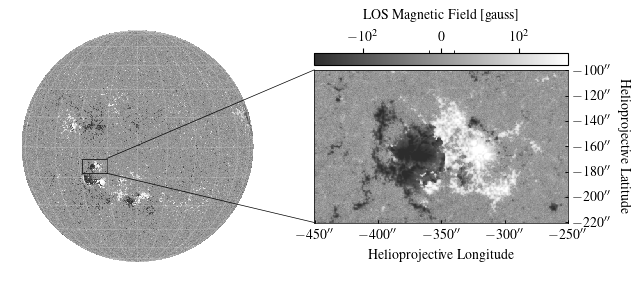

In [4]:
find_corners_SDO(path, ulon=-250, llon=-450, ulat=-100, llat=-220)

##### Instantiate Field2dData object from SDO/HMI data file

In [5]:
data2d = Field2dData.from_fits_SDO(path, ulon=-250, llon=-450, ulat=-100, llat=-220)

##### Check if flux through boundary condition is balanced

check_fluxbalance returns the summation of the flux through the bottom boundary, normalised by the sum of absolute values. 
This returns a value between −1 and 1, where either extreme corresponds to the flux being directed entirely inward or entirely outward, respectively. We consider values 
between −0.01 and 0.01 as flux-balanced in agreement with Wiegelmann & Sakurai (2021). 

In [6]:
np.fabs(check_fluxbalance(data2d.bz)) < 0.01

False

##### Plot 2D boundary condition

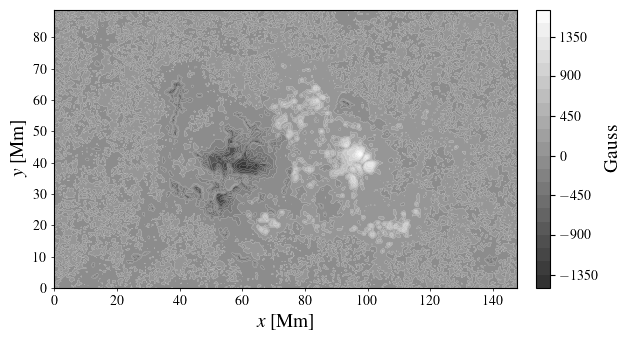

In [7]:
plot_magnetogram_2D(data2d)

##### Extrapolate magnetic field

In [8]:
data3d = calculate_magfield(
    data2d,
    alpha=0.01,
    a=0.2,
    which_solution=WhichSolution.ASYMP,
    b=1.0,
    z0=2.0,
    deltaz=0.2,
)

##### Plot

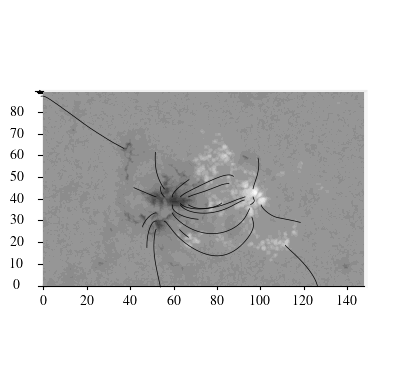

In [9]:
plot_magnetogram_3D(data3d, view="los", footpoints="active-regions")

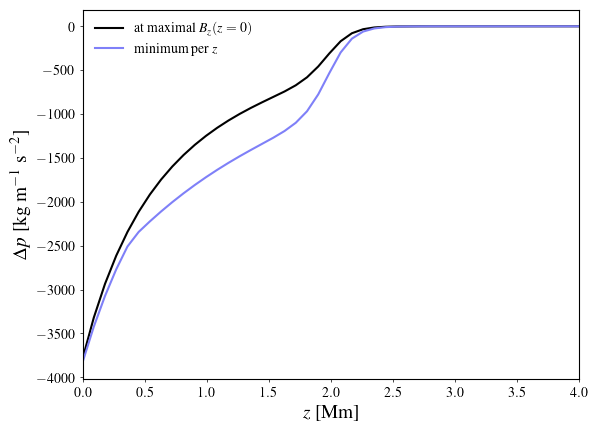

In [10]:
plot_dpressure_z(data3d)

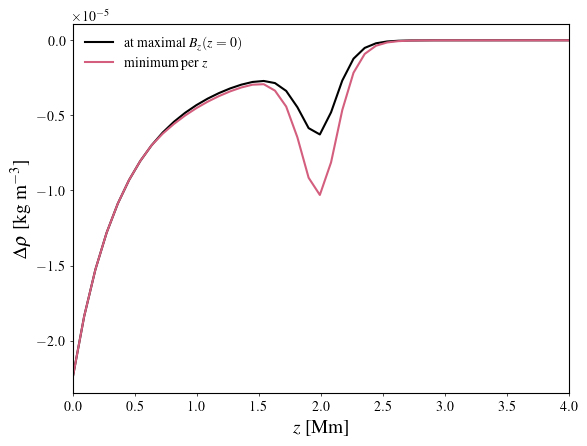

In [11]:
plot_ddensity_z(data3d)

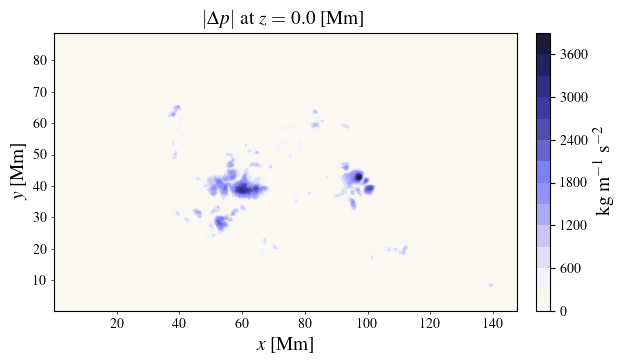

In [21]:
plot_dpressure_xy(data3d, 0)

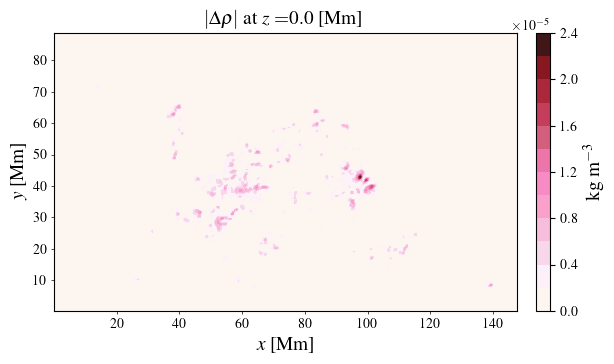

In [22]:
plot_ddensity_xy(data3d, 0)